In [1]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import classification_report
import matplotlib.pyplot as plt  
import seaborn as sns

from sklearn.metrics import cohen_kappa_score

from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold

In [2]:
def indices_general (MC,nombres=None):
    precision_global=np.sum(MC.diagonal())/np.sum(MC)
    error_global=1-precision_global
    
    precision_categoria=pd.DataFrame(MC.diagonal()/np.sum(MC,axis=1)).T
    if nombres!=None:
        precision_categoria.columns=nombres
    return {"Matriz de Confusión":MC,
           "Precision Global":precision_global,
           "Error Global":error_global,
           "Precisión por categoría":precision_categoria}

In [3]:
datos= pd.read_csv('data_muerte_coronaria/datos_train_test_sh.csv',delimiter=',',decimal='.')

In [4]:
datos.shape

(346, 11)

In [5]:
datos.head(2)

,id,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,class
0,0,154,4.50,4.75,23.52,Present,43,25.76,0.0,53,1
1,1,124,1.04,2.84,16.42,Present,46,20.17,0.0,61,0


In [6]:
datos=datos.iloc[0:,1:]
datos.head(3)

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,class
0,154,4.50,4.75,23.52,Present,43,25.76,0.0,53,1
1,124,1.04,2.84,16.42,Present,46,20.17,0.0,61,0
2,148,12.20,3.79,34.15,Absent,57,26.38,14.4,57,1


In [7]:
datos2 = datos.replace({"Present":1,"Absent":0})
datos2

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,class
0,154,4.50,4.75,23.52,1,43,25.76,0.00,53,1
1,124,1.04,2.84,16.42,1,46,20.17,0.00,61,0
2,148,12.20,3.79,34.15,0,57,26.38,14.40,57,1
3,110,4.64,4.55,30.46,0,48,30.90,15.22,46,0
4,164,0.50,6.95,39.64,1,47,41.76,3.81,46,1
...,...,...,...,...,...,...,...,...,...,...
341,158,13.50,5.04,30.79,0,54,24.79,21.50,62,0
342,138,2.00,5.11,31.40,1,49,27.25,2.06,64,1
343,130,0.00,4.89,25.98,0,72,30.42,14.71,23,0
344,174,9.45,5.13,35.54,0,55,30.71,59.79,53,0


In [8]:
X=datos2.iloc[:,0:9]
X.head(4)

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age
0,154,4.50,4.75,23.52,1,43,25.76,0.00,53
1,124,1.04,2.84,16.42,1,46,20.17,0.00,61
2,148,12.20,3.79,34.15,0,57,26.38,14.40,57
3,110,4.64,4.55,30.46,0,48,30.90,15.22,46


In [9]:
y=datos2.iloc[:,9:10]
y.head(4)

,class
0,1
1,0
2,1
3,0


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.05,random_state=50)

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
modelo=RandomForestClassifier(n_estimators=5000,random_state=1, max_depth=15,min_samples_split=18)

In [13]:
modelo.fit(X_train,np.ravel(np.array(y_train)))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=18,
                       min_weight_fraction_leaf=0.0, n_estimators=5000,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [14]:
y_pred=modelo.predict(X_test)

In [15]:
pd.DataFrame(y_pred).head(2)

,0
0,1
1,0


In [16]:
indices=indices_general(metrics.confusion_matrix(y_test,y_pred))
for k in indices:
    print("\n%s:\n%s"%(k,str(indices[k])))


Matriz de Confusión:
[[11  2]
 [ 0  5]]

Precision Global:
0.8888888888888888

Error Global:
0.11111111111111116

Precisión por categoría:
          0    1
0  0.846154  1.0


In [17]:
#
print(accuracy_score(y_test, y_pred))
#
print(recall_score(y_test, y_pred, average='macro'))
#
print(precision_score(y_test, y_pred, average='macro'))
#
print(f1_score(y_test, y_pred, average='macro'))
#
print(classification_report(y_test, y_pred))

0.8888888888888888
0.9230769230769231
0.8571428571428572
0.875
              precision    recall  f1-score   support

           0       1.00      0.85      0.92        13
           1       0.71      1.00      0.83         5

    accuracy                           0.89        18
   macro avg       0.86      0.92      0.88        18
weighted avg       0.92      0.89      0.89        18



In [18]:
cohen_kappa_score(y_test,y_pred)

0.7534246575342466

In [19]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
y_test1 = lb_make.fit_transform(np.ravel(np.array(y_test)))

from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
y1 = lb_make.fit_transform(np.ravel(np.array(y)))

In [20]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [21]:
y_predict_probabilities = modelo.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test1, y_predict_probabilities)
roc_auc = auc(fpr, tpr)

In [22]:
roc_auc

0.9384615384615385

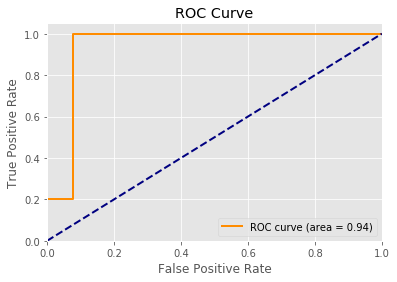

In [23]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [24]:
importancia=modelo.feature_importances_
importancia

array([0.08932919, 0.1955328 , 0.13660707, 0.10958929, 0.05281624,
       0.08045062, 0.08176269, 0.05880074, 0.19511137])

In [25]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.close(fig=None)>

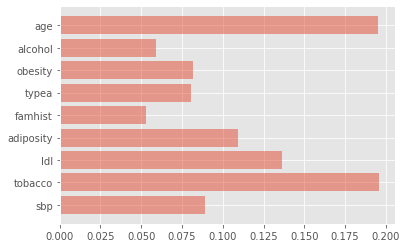

In [26]:
etiquetas=X_train.columns.values
y_pos=np.arange(len(etiquetas))
plt.barh(y_pos,importancia,align="center",alpha=0.5)
plt.yticks(y_pos,etiquetas)
plt.close

*Importar datos nuevos a predecir*

In [27]:
datos_nuevas_instancias= pd.read_csv('data_muerte_coronaria/nuevas_instancias_a_predecir.csv',delimiter=';',decimal='.')

In [28]:
datos_nuevas_instancias.shape

(116, 10)

In [29]:
datos_nuevas_instancias.head(5)

,id,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age
0,1,132,0.00,4.17,36.57,Absent,57,30.61,18.00,49
1,2,124,1.80,3.74,16.64,Present,42,22.26,10.49,20
2,3,198,0.52,11.89,27.68,Present,48,28.40,78.99,26
3,4,128,2.24,2.83,26.48,Absent,48,23.96,47.42,27
4,5,128,2.60,4.94,21.36,Absent,61,21.30,0.00,31


In [30]:
datos_nuevas_instancias2 = datos_nuevas_instancias.replace({"Present":1,"Absent":0})
datos_nuevas_instancias2

,id,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age
0,1,132,0.00,4.17,36.57,0,57,30.61,18.00,49
1,2,124,1.80,3.74,16.64,1,42,22.26,10.49,20
2,3,198,0.52,11.89,27.68,1,48,28.40,78.99,26
3,4,128,2.24,2.83,26.48,0,48,23.96,47.42,27
4,5,128,2.60,4.94,21.36,0,61,21.30,0.00,31
...,...,...,...,...,...,...,...,...,...,...
111,112,152,12.18,4.04,37.83,1,63,34.57,4.17,64
112,113,134,6.10,4.77,26.08,0,47,23.82,1.03,49
113,114,101,0.48,7.26,13.00,0,50,19.82,5.19,16
114,115,134,1.10,3.54,20.41,1,58,24.54,39.91,39


In [41]:
datos_nuevas_instancias = datos_nuevas_instancias2.iloc[:,1:10]
datos_nuevas_instancias

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age
0,132,0.00,4.17,36.57,0,57,30.61,18.00,49
1,124,1.80,3.74,16.64,1,42,22.26,10.49,20
2,198,0.52,11.89,27.68,1,48,28.40,78.99,26
3,128,2.24,2.83,26.48,0,48,23.96,47.42,27
4,128,2.60,4.94,21.36,0,61,21.30,0.00,31
...,...,...,...,...,...,...,...,...,...
111,152,12.18,4.04,37.83,1,63,34.57,4.17,64
112,134,6.10,4.77,26.08,0,47,23.82,1.03,49
113,101,0.48,7.26,13.00,0,50,19.82,5.19,16
114,134,1.10,3.54,20.41,1,58,24.54,39.91,39


In [32]:
prediccion_nuevos_individuos=modelo.predict(datos_nuevas_instancias)
datos_clasificados=pd.DataFrame(prediccion_nuevos_individuos)

In [33]:
datos_clasificados.index = datos_clasificados.index + 1

In [34]:
datos_clasificados.columns = ['Predicted']
datos_clasificados.index.names = ['id']

In [35]:
datos_clasificados.columns

Index(['Predicted'], dtype='object')

In [37]:
datos_clasificados.to_csv('datos_a_predecir.csv',sep=',')